In [1]:
from itertools import product, chain
from IPython.display import Image, display
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from time import sleep
from PIL import Image as Imag
import pyautogui
import pandas as pd
from copy import deepcopy

In [2]:
# Legal moves list
candy_all=['blue', 'red', 'green', 'violett', 'orange']

In [3]:
def closeButtonLookup():
    '''Looks for close button and presses it returns False if close button is not found, else - True'''
    if bool(pyautogui.locateCenterOnScreen('Images/btn_close.png', confidence=0.7))==True:
        x, y = pyautogui.locateCenterOnScreen('Images/btn_close.png', confidence=0.7)
        pyautogui.click(x/2, y/2, duration=0.5, button='right')
        print('OK,I am out of here!')
        return True
    return False

In [4]:
class GameState():
    
    '''Game state, board = dataframe, 'frm' and 'at' = lists of row/colum values of origin and current position'''
    
    def __init__(self,  board, parent=None, frm=None, at=None):
        self.board = board
        self.parent = parent
        self.frm = frm
        self.at = at
        self.score = 0
        self.super = False
        self.matches_vert = list()
        self.matches_horiz = list()
        self.children = list()

In [5]:
class Match():
    
    '''Match contains info on size, position and type of candy'''
    
    def __init__(self, typ, pos):
        self.size = pos.shape[0]
        self.pos = pos
        self.typ = typ       

In [6]:
def find_match(selected): 
    
    '''Takes Series as an input, returns index of a match3 in the series if there is, else: None'''
    
    match=[i for i in selected.index]
    diff = [1]+[i-j for j,i in zip(match[:-1], match[1:])]
    diff = np.absolute(np.array(diff)) 
    mask = diff == 1
    if selected[mask].size>=3:
        return list(selected[mask].index)

    return 

In [7]:
def move_to(global_board, fr, to):

    '''Takes a Dataframe, and two lists of row/col values, swaps values in specified cells. 
        Outputs resulting Data frame '''
    local_board=global_board.copy()
    local_board.loc[fr[0], fr[1]], local_board.loc[to[0], to[1]] = local_board.loc[to[0], to[1]], local_board.loc[fr[0], fr[1]]

    return local_board

In [10]:
def generate_children(global_board, pos):

    '''Generate gamestates from valid moves from a given tile, pos=list of row/col values.
    Return list of gamestates.'''

    positions = np.array(pos)
    directions = np.array([[1, 0], [0, 1], [-1, 0], [0, -1]])
    moves = np.add(positions, directions)

    # Filter the values outside of the local_board
    moves = moves[(0<=moves[:,0]) & (moves[:,0]< board_w)]
    moves = moves[(0<=moves[:,1]) & (moves[:,1]< board_h)]

    # Filter the legal_tiles moves and save them in a children nodes attribute
    children=[]
    for move in moves:
        if tuple(move) in legal_tiles:
            local_board = move_to(global_board, pos, move)
#             display(local_board)
            m = GameState(local_board, None, frm=pos, at=move)
#             print(id(m.board))
            children.append(m)

    return children

## Scan the game area, identify the cell contaiins.

#### Get input for board height and width.

In [11]:
board_w = int(input('Borad width is:  '))

Borad width is:  7


In [12]:
board_h = int(input('Borad width is: '))

Borad width is: 8


In [13]:
wanted = input('Enter the color and amount of the wanted tiles, e.g. red, blue, orange, violet, green followed by number.')

Enter the color and amount of the wanted tiles, e.g. red, blue, orange, violet, green followed by number.


In [14]:
tile_w = 138
tile_h = 133

In [15]:
wanted = wanted.split()

In [16]:
offset_x = tile_w/2
offset_y = tile_h/2

In [17]:
screensize = pyautogui.size()
screensize

Size(width=1440, height=900)

In [18]:
game_scr_size =  board_w * tile_w, board_h * tile_h
corner = screensize[1]*2 - game_scr_size[1]
t=pyautogui.screenshot('Images/board_ss.png',region=(10, corner, game_scr_size[0], game_scr_size[1]))

In [19]:
image = Imag.open("Images/board_ss.png")
image_array = np.array(image)

In [20]:
tilesize = ((image_array.shape[0]/5), (image_array.shape[1]/5))
tilesize

(212.8, 193.2)

In [21]:
green = Imag.open('Images/candy_green.png')
violet = Imag.open('Images/candy_violet.png')
blue = Imag.open('Images/candy_blue.png')
orange = Imag.open('Images/candy_orange.png')
obstacle = Imag.open('Images/obstacle_1.png')

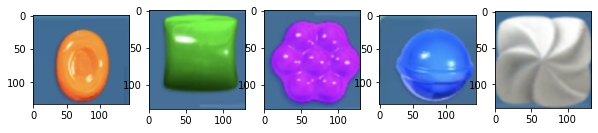

In [22]:
fig = plt.figure(figsize=(10, 7))
rows =1
columns =5
count=0
for im in [orange, green, violet, blue, np.array(obstacle)]:
    count+=1
    fig.add_subplot(rows, columns, count)
    plt.imshow(im)   

In [23]:
# TODO: change  mean calculations to use the pix_avg() function

In [205]:
print(blue.shape)
a = np.mean(blue, axis=1)
b = np.ones(133)
blue_mean = np.matmul(a.T,b)/133

(133, 145, 4)


In [199]:
# Get mean RGB values
c = np.mean(orange, axis=1)
orange_mean = np.matmul(c.T,b)/133

In [201]:
d = np.mean(violet, axis=1)
violet_mean = pix_avg(violerr

In [204]:
e = np.mean(green, axis=1)
green_mean = np.matmul(e.T,b)/133

In [286]:
obstacle_mean = pix_avg(obstacle)

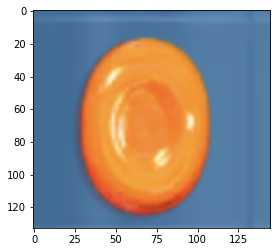

In [219]:
sample1 = image_array[133:133*2, 145*3:145*4]
plt.imshow(sample1)

In [222]:
def pix_avg(pix_array):
    x = np.mean(pix_array, axis=1)
    y = np.ones(133)
    return np.matmul(x.T,y)/133

In [287]:
candy_rgb = pd.DataFrame([green_mean, blue_mean, violet_mean, orange_mean, obstacle_mean], index =['green','blue','violet','orange','obstacle'])

In [223]:
pix_avg(sample1)

array([133.94980555, 126.79533316, 123.41840809, 255.        ])

In [288]:
diff = candy_rgb - pix_avg(sample1)
diff

,0,1,2,3
green,-56.530430,14.429826,-27.891803,0.0
blue,-67.781592,-12.402385,70.467617,0.0
violet,-2.414062,-55.034951,82.091193,0.0
orange,-6.855276,-6.378118,-6.362873,0.0
obstacle,30.163485,43.704130,49.655932,0.0


In [290]:
error = np.matmul(np.abs(candy_rgb.to_numpy()-pix_avg(sample1).T), np.ones(4))

In [293]:
candy_rgb.index[np.argmin(error)]

'orange'

## Create a representation of the game board.

In [296]:
board = pd.DataFrame('0', index=range(board_h), columns=range(board_w))
Root = GameState(board.copy()) 

In [297]:
def select_type(typ, board, ind=board.index, col=board.columns):

    '''Select all instances of a given type in a Series = board.iloc[index, column] 
    where board is Pandas DataFrame. When calling the function one of the kwargs MUST be given in a call'''

    selected = board.loc[ind,col][board.loc[ind,col]==typ]
    if selected.size>=3:
        return selected

    return pd.Series(dtype='object')

### Split game ss to tiles.

In [511]:
all_tiles = list(product(range(5),range(5)))

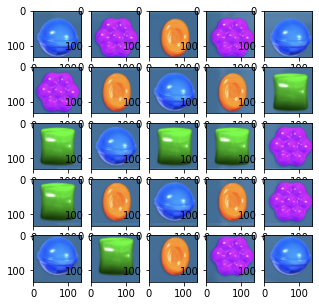

In [540]:
fig = plt.figure(figsize=(5, 5))
rows =5
columns =5
count=0  
for i in all_tiles:
    count+=1
    fig.add_subplot(rows, columns, count)
    starts = np.array(i) 
    ends = np.array(i)+1 
    start = (starts * tilesize ).astype(int)
    end = (ends * tilesize).astype(int)
    plt.imshow(image_array[start[0]:end[0], start[1]:end[1]])

#### Add some candy manually for testing purpouse

In [299]:
Root.board.loc[1,[1,2]]='red'
Root.board.loc[2,[2,3]]='blue'
Root.board.loc[[0,2,3],4]='red'
Root.board.loc[1,1]='blue'
Root.board.loc[[2,3],1]='orange'
Root.board.loc[1,[2,3]]='orange'
Root.board.loc[0,1]='red'
Root.board.loc[1,4]='blue'
Root.board.loc[3,2]='blue'
Root.board.loc[4,4]='obstacle'
# Root.board.loc[2,0], Root.board.loc[2,1]=Root.board.loc[2,1],Root.board.loc[2,0]

In [300]:
Root.board

,0,1,2,3,4
0,0,red,0,0,red
1,0,blue,orange,orange,blue
2,0,orange,blue,blue,red
3,0,orange,blue,0,red
4,0,0,0,0,obstacle


In [535]:
tilesize = np.array(image_array.shape[:1])/np.array([board_h, board_w])
tilesize = tilesize.round().astype(int)
tilesize[1]=138 

In [108]:
legal_tiles = [tile for tile in all_tiles if Root.board.iloc[tile[0], tile[1]] in candy_all]
# legal_tiles: in the game only candies can move

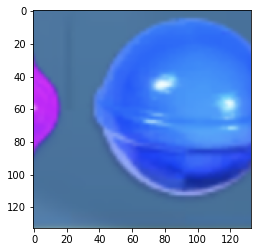

In [533]:
  plt.imshow(image_array[start[0]:end[0], start[1]:end[1]])

## Look for the matches

In [110]:
candidates = list()

In [111]:
for tile in legal_tiles:
#     print(tile)
#     display(generate_children(Root.board.copy(), tile)[0].board)
    candidates.extend(generate_children(Root.board.copy(), tile))

In [526]:
  plt.imshow(image_array[532:665,

AttributeError: 'numpy.ndarray' object has no attribute 'loc'

In [112]:
# candidates

### Look for matches in the resulting boards.

In [113]:
for candidate in candidates:
    # Column-wise
    # Get types of the match to look for.
    types=[]
    types.append(candidate.board.iloc[candidate.frm[0], candidate.frm[1]])
    types.append(candidate.board.iloc[candidate.at[0], candidate.at[1]])
    for typ in types:

        # Search the column for the values of the given type
        res_vert = {i : select_type(typ, candidate.board, col=i) for i in candidate.board.columns 
                    if select_type(typ, candidate.board, col=i).any()}

        # Now look for actual matches in the result of the search
        for key, val in res_vert.items():
                        match = find_match(val)
                        if match:
                            candidate.matches_vert.append( Match( val.all(), candidate.board.loc[match,key] ))
        # And row-wise
        res_horiz = {i : select_type(typ, candidate.board, ind=i) for i in candidate.board.index 
                     if select_type(typ, candidate.board, ind=i).any()}

        for key, val in res_horiz.items():
                        match = find_match(val)
                        if match:
                            candidate.matches_horiz.append( Match( val.all(), candidate.board.loc[key, match] ))

### Prune the children. Keep boards with matches, delete the rest.

In [116]:
# Choose candidates that have vertical matches:
vert_cands = [cand for cand in candidates if any(cand.matches_vert)]

In [117]:
# Choose candidates that have horizontal matches:
horiz_cands = [cand for cand in candidates if any(cand.matches_horiz)]

### Evaluate children

In [118]:
selected = []

In [ ]:
# Look for double matches of the same type as they are likely to indicate super matches
# Select cadidates that have matches in both horiz and vert, check if both matches are same color.

In [ ]:
# TODO: add bonus score for a sertain amount of certain type of candy.

In [ ]:
# TODO: add score for obstacles in neighbouring board cells.

In [119]:
for gamestate in filter(lambda x: x in horiz_cands, vert_cands):
#     display(gamestate.board)
    if any([i.typ==j.typ for i in gamestate.matches_vert for j in gamestate.matches_horiz]):
        gamestate.super=True
    selected.append(gamestate)    

In [120]:
# Sum of all matches sizes in the GameState
def sum_score(instance):
    s = sum([match.size for match in instance.matches_horiz]) + sum(match.size for match in instance.matches_vert)   
    return s

In [122]:
main_candidate_horiz = max(horiz_cands, key=sum_score)
if any([match.size>3 for match in main_candidate_horiz.matches_horiz]):
    main_candidate_horiz.super = True

In [123]:
main_candidate_vert = max(vert_cands, key=sum_score)
if any([match.size>3 for match in main_candidate_vert.matches_vert]):
    main_candidate_vert.super = True

In [124]:
main_candidate_horiz.score = sum_score(main_candidate_horiz)

In [125]:
main_candidate_vert.score += sum_score(main_candidate_vert)

In [126]:
selected.extend([main_candidate_horiz, main_candidate_vert])

In [127]:
best = max(selected, key = lambda x: x.score)

In [269]:
best.board

,0,1,2,3,4
0,0,red,0,0,red
1,0,orange,orange,orange,blue
2,0,blue,blue,blue,red
3,0,orange,blue,0,red
4,0,0,0,0,0


In [ ]:
# screen size
pyautogui.size().height

In [301]:
Root.board

,0,1,2,3,4
0,0,red,0,0,red
1,0,blue,orange,orange,blue
2,0,orange,blue,blue,red
3,0,orange,blue,0,red
4,0,0,0,0,obstacle


In [366]:
Root.board.loc[:,4][Root.board[4]=='red'].index.max()

3

In [362]:
Root.board.shift(-1).loc[[2, 3],4]

2         red
3    obstacle
Name: 4, dtype: object

In [360]:
Root.board[4][Root.board[4]=='obstacle'].shift(-1)

4    NaN
Name: 4, dtype: object

In [355]:
Root.board

,0,1,2,3,4
0,0,red,0,0,red
1,0,blue,orange,orange,blue
2,0,orange,blue,blue,red
3,0,orange,blue,0,red
4,0,0,0,0,obstacle


In [311]:
Root.board[4]=='red'

0     True
1    False
2     True
3     True
4    False
Name: 4, dtype: bool

In [291]:
np.argmin(error)

3